In [1]:
import pandas as np
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.python import keras
from tensorflow.python.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tqdm import tqdm

C:\Users\dell\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_class=5

In [3]:
dir='F:\\Data science\\00Data\\image\\flowers'
import os
print(os.listdir(dir))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [4]:
x=[]
y=[]
image_size=150
num_classes=5
from os.path import join
daisy_dir='F:\\Data science\\00Data\\image\\flowers\\daisy'
dandelion_dir='F:\\Data science\\00Data\\image\\flowers\\dandelion'
rose_dir='F:\\Data science\\00Data\\image\\flowers\\rose'
sunflower_dir='F:\\Data science\\00Data\\image\\flowers\\sunflower'
tulip_dir='F:\\Data science\\00Data\\image\\flowers\\tulip'

def img_and_labels(flower_name,Dir):
    for img in tqdm(os.listdir(Dir)):
        img_path=join(Dir,img)
        imgs=load_img(img_path, target_size=(224,224))
        img_array=np.array(img_to_array(imgs))
        image=img_array/255
        label=flower_name
        x.append(image)
        y.append(str(label))
    

In [5]:
img_and_labels('rose',rose_dir)

100%|████████████████████████████████████████████████████████████████████████████████| 784/784 [00:08<00:00, 93.57it/s]


In [6]:
img_and_labels('daisy',daisy_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:06<00:00, 118.68it/s]


In [7]:
img_and_labels('dandelion',dandelion_dir)

 99%|████████████████████████████████████████████████████████████████████████████▎| 1046/1055 [00:09<00:00, 107.26it/s]


OSError: cannot identify image file 'F:\\Data science\\00Data\\image\\flowers\\dandelion\\flickr.py'

In [8]:
img_and_labels('sunflower',sunflower_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:07<00:00, 124.58it/s]


In [9]:
img_and_labels('tulip',tulip_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:06<00:00, 161.07it/s]


In [10]:
total_images_and_labels=[len(x),len(y)]
print(total_images_and_labels)

[4323, 4323]


In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

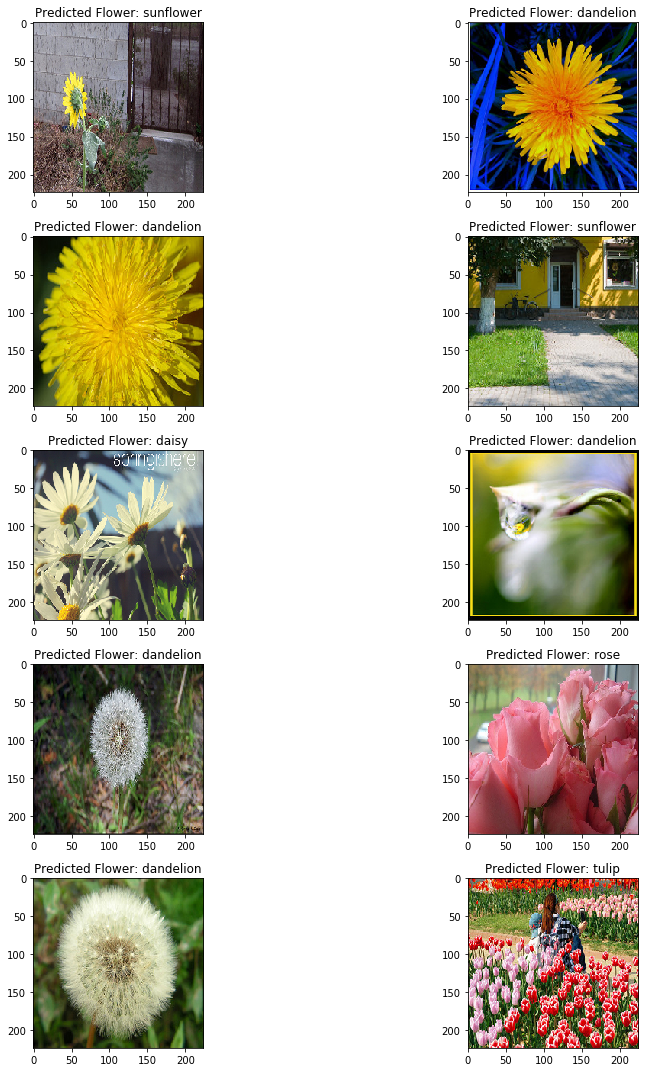

In [12]:
import random as rn

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        random=rn.randint(0,len(y))
        ax[i,j].imshow(x[random])
        ax[i,j].set_title('Predicted Flower: '+y[random])
plt.tight_layout()


In [ ]:
X=np.array(x)


In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)
y_out=to_categorical(Y,5)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y_out,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

In [ ]:
model=Sequential()
model.add(Conv2D(128, kernel_size=(5,5), input_shape=(224,224,3), activation='relu'))
model.add(Dropout(.5))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(Dropout(.5))
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(img_class,activation='softmax'))

In [ ]:
x_train.shape


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input, width_shift_range=0.12, height_shift_range=0.12,horizontal_flip=True)
data_generator.fit(x_train)

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=120, batch_size=100, verbose=2,
                    validation_data=(x_test, y_test))

In [ ]:

from keras_hist_graph import plot_history
plot_history(history)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
history.history['acc']

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()